## Compare the ssGEMs size(gene/rxns) among strains from different clade
- 1.size comparison
- 2.common lost gene&reaction

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set work dir
os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database')

In [5]:
# # load ssGEM size data
df_model_size = pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/gimme_0.9_ssGEMs_size.csv',index_col=0)
# # add .re 
df_model_size.index = [i+'.re' for i in df_model_size.index]

# df_model_size = pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/gimme_ssGEMs_size_noyeast9.csv',index_col=0)
# df_model_size=df_model_size[df_model_size.index.isin(df_model_size0.index)]


# df_model_size = pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/riptide_ssGEMs_size.csv',index_col=0)
# df_model_size=df_model_size0

# test='BKI_2.re'
# print(df_model_size.loc[test])
# print(df_model_size0.loc[test])

In [6]:
# load strain info
df_strain_info = pd.read_excel(r'data\1897_strains_info.xlsx',index_col=0)
df_strain_info

,strain,source,original_ecological_description,geographic_origin,Ploidy,type_L1,type_L2,type_L3,type,sub_type,lg_classify,assemble_level,genomeSize,contigNums,N50,gene_numb,remove,nature_clade,growth_type
genome_id,,,,,,,,,,,,,,,,,,,
BFC_3.re,EXF-5295,1011_nature,Fermentation,Slovenia,2,Domesticated,Non-alcoholic fermentation,Fermentation-unassigned,Fermentation,Fermentation,Fermentation,contig,11830106.0,1534.0,203532.0,6380.0,False,1. Wine/European,medium
AGL_2.re,CBS4458,1011_nature,Wine,France,1,Domesticated,Alcohol,Wine,Wine,Wine,Wine,contig,12043831.0,4846.0,141324.0,6280.0,False,1. Wine/European,slow
ABE_5.re,YJM434_1b,1011_nature,"Human, clinical",0,1,Human,Human,Human,Human,Human,"Human, clinical",contig,12024093.0,4239.0,165966.0,6353.0,False,1. Wine/European,fast
YAM.re,YJM453,1011_nature,"Human, clinical",0,2,Human,Human,Human,Human,0,NaN,contig,11826830.0,1674.0,122940.0,6385.0,False,1. Wine/European,medium
BKI_2.re,DBVPG1554,1011_nature,Wine,Dalmatia,2,Domesticated,Alcohol,Wine,Wine,Wine,Wine,contig,11761442.0,1477.0,221563.0,6370.0,False,1. Wine/European,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCA_001741415.1_ASM174141v1_genomic,beer013,lg_others,Beer,0,0,Domesticated,Alcohol,Beer,Wine,Beer,Beer,chromosome,12289288.0,298.0,920709.0,6431.0,False,NaN,NaN
GCA_001738495.1_ASM173849v1_genomic,bread003,lg_others,Bakery,0,0,Domesticated,Non-alcoholic fermentation,Bakery,Fermentation,Bakery,Bakery,chromosome,12343512.0,360.0,905142.0,6392.0,False,NaN,NaN
GCA_001669965.1_ASM166996v1_genomic,T.52_2H,lg_others,Wine,0,0,Domesticated,Alcohol,Wine,Wine,Wine,Wine,chromosome,12111851.0,17.0,922821.0,6404.0,False,NaN,NaN


In [7]:
df_model_size['type']=df_model_size.index.map(lambda x: df_strain_info.loc[x,'nature_clade'])

# remove type nan
df_model_size = df_model_size.dropna(subset=['type'])
df_model_size

wildtypelist=['14. CHNIII ','20. CHN V ', '15. CHNII ','17. Taiwanese ', '24. Asian islands ', '18. Far East Asia ', '19. Malaysian ', '22. Far East Russian ']
# change all type in wildtypelist to wildtype
df_model_size['type'] = df_model_size['type'].map(lambda x: 'wildtype' if x in wildtypelist else x)

# remove clade if it has less than 15 strains
df_model_size = df_model_size.groupby('type').filter(lambda x: len(x) >= 15)

# sort df_model_size by type,and set wildtype as the first
df_model_size = df_model_size.sort_values(by='type',ascending=False)
df_model_size

# save the df_model_size
# df_model_size.to_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/gimme_ssGEMs_size.csv')

,gene_number,reaction_number,metabolite_number,type
CDL_3.re,1062,3962,2815,wildtype
BAI_7.re,1060,3950,2793,wildtype
BAG_6.re,1068,3936,2802,wildtype
CEI_2.re,1063,3919,2817,wildtype
AKM_4.re,1070,3945,2806,wildtype
...,...,...,...,...
BLT_2.re,1073,3961,2846,1. Wine/European
BLR_3.re,1079,3947,2808,1. Wine/European
BLQ_1.re,1052,3956,2842,1. Wine/European
BLP_5.re,1089,3942,2818,1. Wine/European


M2. Mosaic region 2 0.009984033569035617
5. French dairy  2.7005242753538523e-05
2. Alpechin  0.04771735045260257
13. African palm wine  1.746036732993839e-05
10. French Guiana human  0.0002296227174439621
1. Wine/European (subclade 4) 2.38460818190181e-07
1. Wine/European (subclade 3) 0.00202223728417945
1. Wine/European (subclade 1) 0.03869640255668129


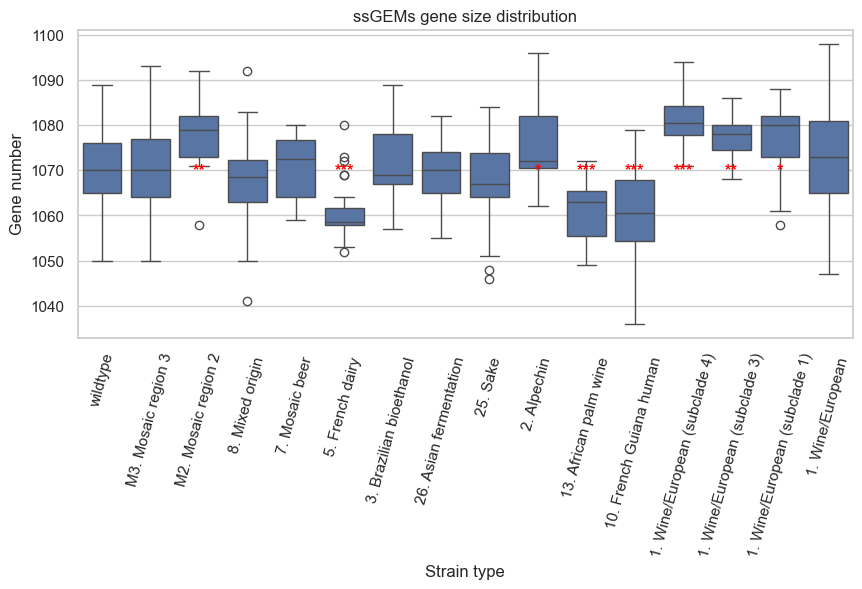

In [8]:
# plot size distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 4))
sns.boxplot(x="type", y="gene_number", data=df_model_size)
plt.title('ssGEMs gene size distribution')
plt.ylabel('Gene number')
plt.xlabel('Strain type')
plt.xticks(rotation=75)
# plt.show()
# calculate the p value of each type to wildtype
from scipy import stats
df_p = pd.DataFrame()
for t in df_model_size['type'].unique():
    if t != 'wildtype':
        p = stats.ttest_ind(df_model_size[df_model_size['type']==t]['gene_number'], df_model_size[df_model_size['type']=='wildtype']['gene_number']).pvalue
        if p < 0.05:
            print(t, p)
            # add p value to plot
            if p<0.001:
                sig='***'
            elif p<0.01:
                sig='**'
            else:
                sig='*'
            plt.text(df_model_size['type'].unique().tolist().index(t), 1070, sig, fontsize=12, ha='center', va='center', color='red', weight='bold')
plt.show()

M3. Mosaic region 3 0.013477480876106885
M2. Mosaic region 2 0.03278465331773683
8. Mixed origin  0.03303412331321197
25. Sake  0.0021202579565853526
13. African palm wine  0.010373338193488279
10. French Guiana human  0.0037679631320769185


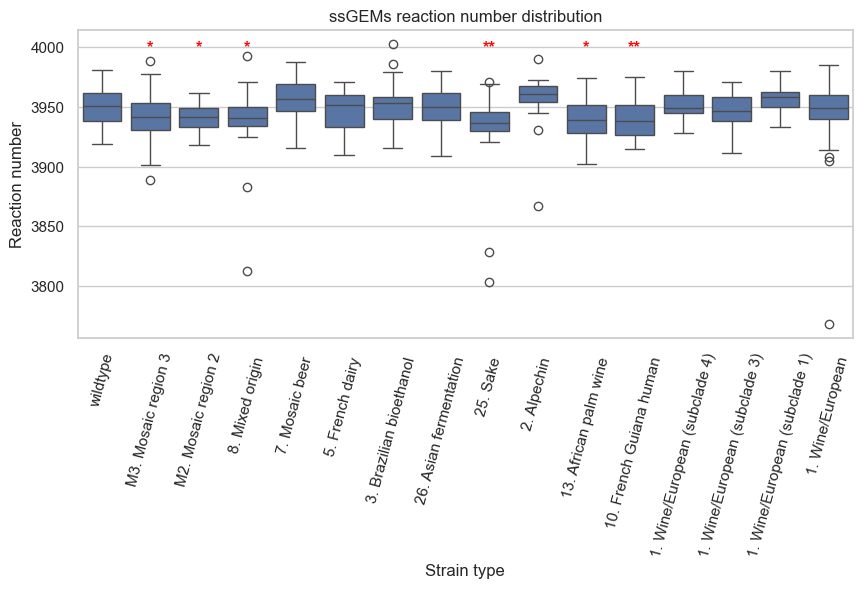

In [9]:
# plot reaction number distribution
plt.figure(figsize=(10, 4))
sns.boxplot(x="type", y="reaction_number", data=df_model_size)
# violin plot
# sns.violinplot(x="type", y="reaction_number", data=df_model_size, palette="Set3")
plt.title('ssGEMs reaction number distribution')
plt.ylabel('Reaction number')
plt.xlabel('Strain type')
plt.xticks(rotation=75)
# plt.ylim(3700,3800)
# plt.show()

# calculate the p value of each type to wildtype
from scipy import stats
df_p = pd.DataFrame()
for t in df_model_size['type'].unique():
    if t != 'wildtype':
        p = stats.ttest_ind(df_model_size[df_model_size['type']==t]['reaction_number'], df_model_size[df_model_size['type']=='wildtype']['reaction_number']).pvalue
        if p < 0.05:
            print(t, p)
            # add * to the plot
            if p < 0.001:
                sig='***'
            elif p < 0.01:
                sig='**'
            else:
                sig='*'
            plt.text(df_model_size['type'].unique().tolist().index(t), 4000, sig, fontsize=12, ha='center', va='center', color='red', weight='bold')
plt.show()

- conclusion:

bioethanol/diary/human clade show smaller metabolic network than wild type,so we need to further detect the specific difference about metabolic network among different strain type.

### 2.check the lost reaction in each strain

In [12]:
# load reaction matrix
rxnMatrix = pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/gimme_ssGEMs_rxnMatrix_noyeast9.csv',index_col=0)
# rxnMatrix = pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/gimme_0.9_ssGEMs_rxnMatrix.csv',index_col=0)
# add .re
# rxnMatrix.columns=rxnMatrix.columns.map(lambda x: x+'.re')
rxnMatrix

,AAA_6.re,AAB_6.re,AAD_6.re,AAE_6.re,AAG_6.re,AAH_6.re,AAI_6.re,AAK_6.re,AAL_3.re,AAM_3.re,...,YCV.re,YDB.re,YDC.re,YDD.re,YDE.re,YDF.re,YDH.re,YDI.re,YDJ.re,YDK.re
r_0001,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
r_0002,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
r_0003,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
r_0004,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
r_0005,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
r_4629,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
r_4631,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
r_4632,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
r_4702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# set wildtype core reaction list as the reference to compare with other strains
ref_strainList=df_model_size[df_model_size['type']=='wildtype'].index.tolist()
ref_rxnMatrix=rxnMatrix.loc[:,ref_strainList]
ref_rxnList=ref_rxnMatrix.index[ref_rxnMatrix.sum(axis=1)>=len(ref_strainList)*1].tolist()

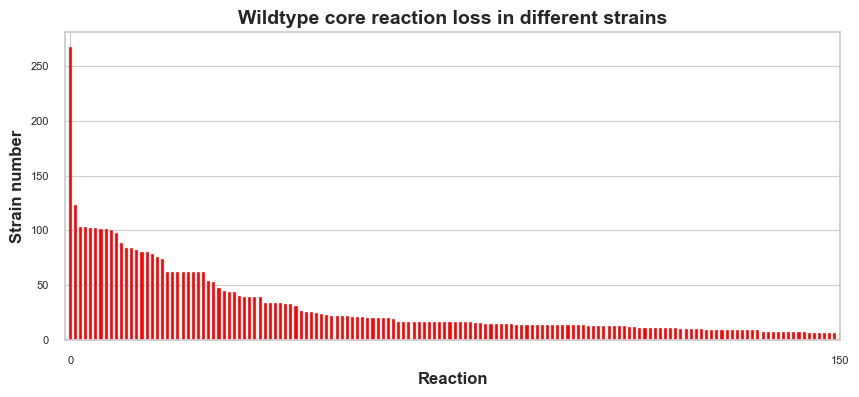

In [14]:
refrxn_Matrix=rxnMatrix.loc[ref_rxnList,:]
# remove ref_strainList from rxnMatrix
refrxn_Matrix=refrxn_Matrix.drop(columns=ref_strainList)

# count 0 value frequence in each row
df_lost_count=refrxn_Matrix.apply(lambda x: len(x[x==0]),axis=1)
df_lost_count.sort_values(ascending=False,inplace=True)
# plot lost reaction number as a bar plot
# set plot theme as scientific
plt.style.use('seaborn-v0_8-paper')
# set font style as Arial
plt.rcParams['font.sans-serif'] = ['Arial']
fig,ax=plt.subplots(figsize=(10,4))
# set bar width
width=0.6  # Adjust the width value here
df_lost_count.plot(kind='bar',ax=ax,color='red',width=width, align='center',edgecolor=None)
plt.title('Wildtype core reaction loss in different strains',fontsize=14,fontweight='bold')
plt.ylabel('Strain number',fontsize=12,fontweight='bold')
plt.xlabel('Reaction',fontsize=12,fontweight='bold')
# do not show x label
plt.xticks([])
# set x range
plt.xlim(-1,150)
# label 0 , 300 in x axis
plt.xticks([0,150],['0','150'],rotation=0)
plt.show()

In [15]:
# save df_lost_count
df_lost_count.to_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/allstrain_core_rxn_loss.csv')

C:\Users\wangh\AppData\Local\Temp\ipykernel_27388\2106337374.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([gene_exps,ref_gene_exp],labels=['r_0730 inactive strains','wildtype'],showmeans=True)


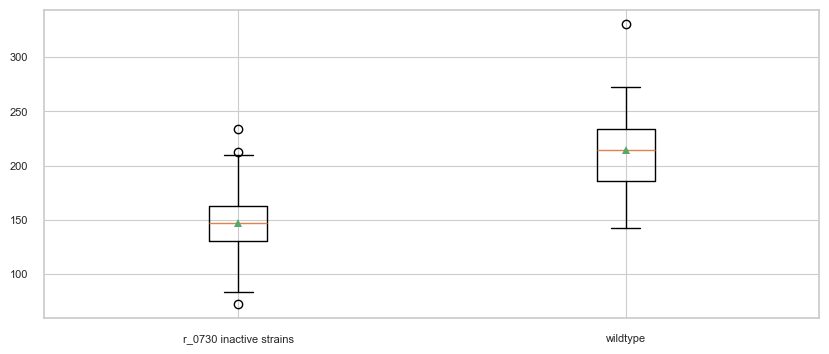

In [27]:
# check the gene expression level of most frequently inactive reaction: r_0730
gene='YGR171C'
# load transcriptomics data
df_transcriptomics=pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/sce969_transcriptome_countMatrix_normalized.csv',index_col=0)

r_0730_lost_strainList=rxnMatrix.loc['r_0730',rxnMatrix.loc['r_0730']==0].index.tolist()

gene_exps=df_transcriptomics.loc[gene,r_0730_lost_strainList]
ref_gene_exp=df_transcriptomics.loc[gene,ref_strainList]

# plot the boxplot
plt.figure(figsize=(10, 4))
plt.boxplot([gene_exps,ref_gene_exp],labels=['r_0730 inactive strains','wildtype'],showmeans=True)
plt.show()


In [16]:
from gseapy import barplot
import gseapy as gp
def enr_analysis(rxnList,pathway_dict,background,title='enrichment analysis'):
    enr=gp.enrichr(gene_list=rxnList,
                   gene_sets=pathway_dict,
                   background=background,
                   outdir=None,
                   no_plot=True)
    
    # plot
    try:
        ax=barplot(enr.res2d,
                column='Adjusted P-value',
                    title=title,cutoff=0.05,figsize=(4,2))
    except:
        print('No significant enrichment')
    return enr.res2d

# load pathway dict
import cobra
model=cobra.io.read_sbml_model(r'model/yeast-GEM.xml')
pathway_dict={}
for group in model.groups:
    name=group.name
    # if 'Transport' in name:
    #     continue
    rxnIDlist=[rxn.id for rxn in group.members]
    pathway_dict[name]=rxnIDlist

In [17]:
# print top 20 lost reaction, the reaction name and the subsystem
for i in df_lost_count.index[:60]:
    print(i,model.reactions.get_by_id(i).name,model.reactions.get_by_id(i).subsystem)

r_0730 methionyl-tRNA synthetase tRNA metabolism
r_1118 aspartate-glutamate transporter Transport [c, m]
r_3215 PI 4,5-P2 phosphatase (1-18:1, 2-18:1), ER membrane Inositol phosphate metabolism
r_3213 PI 4,5-P2 phosphatase (1-16:1, 2-18:1), ER membrane Inositol phosphate metabolism
r_3208 PI 4,5-P2 phosphatase (1-16:0, 2-16:1), ER membrane Inositol phosphate metabolism
r_3214 PI 4,5-P2 phosphatase (1-18:0, 2-18:1), ER membrane Inositol phosphate metabolism
r_3209 PI 4,5-P2 phosphatase (1-16:1, 2-16:1), ER membrane Inositol phosphate metabolism
r_3212 PI 4,5-P2 phosphatase (1-16:0, 2-18:1), ER membrane Inositol phosphate metabolism
r_3210 PI 4,5-P2 phosphatase (1-18:0, 2-16:1), ER membrane Inositol phosphate metabolism
r_3211 PI 4,5-P2 phosphatase (1-18:1, 2-16:1), ER membrane Inositol phosphate metabolism
r_3104 PC phospholipase D (1-16:0, 2-16:1), cell envelope Glycerophospholipid metabolism
r_3109 PC phospholipase D (1-16:1, 2-18:1), cell envelope Glycerophospholipid metabolism
r_310

40th lost strains: 34


d:\softwares\programming\anoconda\envs\data\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


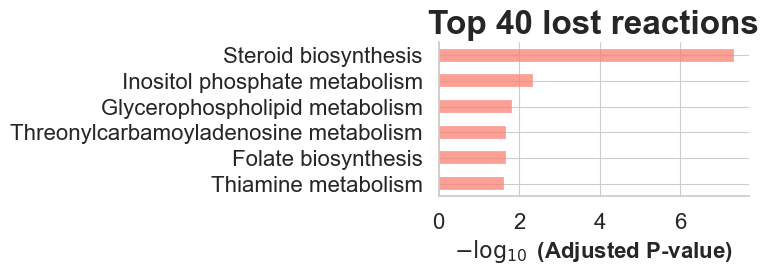

In [19]:
# rxn_nums=[20,40,60]
rxn_nums=[40]
for num in rxn_nums:
    rxnList=df_lost_count.index[:num].tolist()
    print(f'{num}th lost strains: {df_lost_count.iloc[num-1]}')
    enr_res=enr_analysis(rxnList,pathway_dict,background=None,title=f'Top {num} lost reactions')

In [20]:
enr_res.to_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/allstrain_lost_corerxn_enrichment_analysis.csv')

### 3.check different lost reaction/gene in different clade

In [16]:
# select the clades that mean rxn size is significantly smaller than wildtype
from scipy import stats
sig_clades = []
for t in df_model_size['type'].unique():
    wt_mean = df_model_size[df_model_size['type']=='wildtype']['reaction_number'].mean()
    if t != 'wildtype':
        p = stats.ttest_ind(df_model_size[df_model_size['type']==t]['reaction_number'], df_model_size[df_model_size['type']=='wildtype']['reaction_number']).pvalue
        mean= df_model_size[df_model_size['type']==t]['reaction_number'].mean()
        if p < 0.05 and mean<wt_mean:
            sig_clades.append(t)
            print(t, p, mean, wt_mean)

sig_clades=df_model_size['type'].unique()

M3. Mosaic region 3 0.013477480876106885 3942.61797752809 3950.9189189189187
M2. Mosaic region 2 0.03278465331773683 3940.9411764705883 3950.9189189189187
8. Mixed origin  0.03303412331321197 3939.775 3950.9189189189187
25. Sake  0.0021202579565853526 3934.2391304347825 3950.9189189189187
13. African palm wine  0.010373338193488279 3939.8518518518517 3950.9189189189187
10. French Guiana human  0.0037679631320769185 3939.3 3950.9189189189187


In [17]:
from scipy.stats import chi2_contingency

def extract_clade_strainList(clade,df_info):
    strainList=df_info[df_info['type']==clade].index.tolist()
    return strainList


def calculate_rxn_freq(rxnMatrix):
    '''Calculate the frequency of each rxn in the strainList'''
    rxn_freq=rxnMatrix.sum(axis=1)/len(rxnMatrix.columns)
    return rxn_freq


def calculate_chi_square(vector1,vector2):
    df_contingency = pd.crosstab(vector1, vector2)
    chi2, p, dof, expected = chi2_contingency(df_contingency)
    return p

def calculate_clade_chi(df,clade1_strainList,clade2_strainList):
    df_chi_result=pd.Series(index=df.index)
    for gene in df.index:
        presence_vector=df.loc[gene,clade1_strainList+clade2_strainList]
        label_vector=[1]*len(clade1_strainList)+[0]*len(clade2_strainList)
        p=calculate_chi_square(presence_vector,label_vector)
        df_chi_result[gene]=p
    return df_chi_result

def extract_clade_specific_reactions_by_chi(target_clade,reference='wildtype',rxnMatrix=rxnMatrix,df_info=df_model_size,p_value_cutoff=0.05):
    ref_strainList=extract_clade_strainList(reference,df_info)
    clade_strainList=extract_clade_strainList(target_clade,df_info)

    df_chi=calculate_clade_chi(rxnMatrix,clade_strainList,ref_strainList)
    
    clade_specific_rxnList=df_chi[df_chi<p_value_cutoff].index.tolist()
    
    ref_rxnMatrix=rxnMatrix.loc[:,ref_strainList]
    clade_rxnMatrix=rxnMatrix.loc[:,clade_strainList]

    ref_freq=calculate_rxn_freq(ref_rxnMatrix)
    clade_freq=calculate_rxn_freq(clade_rxnMatrix)
    df_freq=pd.DataFrame({'wildtype':ref_freq,target_clade:clade_freq})
    df_freq.fillna(0,inplace=True)

    clade_specific_lost_rxnList=[i for i in clade_specific_rxnList if df_freq.loc[i,'wildtype']>df_freq.loc[i,target_clade]]
    
    return clade_specific_lost_rxnList


# def extract_clade_lost_rxn(target_clade,reference='wildtype',rxnMatrix=rxnMatrix,df_info=df_model_size,threshold=0.9):
#     ref_strainList=extract_clade_strainList(reference,df_info)
#     ref_rxnMatrix=rxnMatrix.loc[:,ref_strainList]

#     clade_strainList=extract_clade_strainList(target_clade,df_info)
#     clade_rxnMatrix=rxnMatrix.loc[:,clade_strainList]

#     ref_rxnList=ref_rxnMatrix.index[ref_rxnMatrix.sum(axis=1)>=len(ref_strainList)*threshold].tolist()
#     clade_rxnList=clade_rxnMatrix.index[clade_rxnMatrix.sum(axis=1)>=len(clade_strainList)*(threshold-0.05)].tolist()
#     # print(len(clade_strainList))

#     lost_rxnList=[i for i in ref_rxnList if i not in clade_rxnList]

#     return lost_rxnList


# def extract_clade_lost_rxn2(target_clade,reference='wildtype',rxnMatrix=rxnMatrix,df_info=df_model_size,threshold=0.2):
#     ref_strainList=extract_clade_strainList(reference,df_info)
#     ref_rxnMatrix=rxnMatrix.loc[:,ref_strainList]
#     ref_rxnfreq=calculate_rxn_freq(ref_rxnMatrix)

#     clade_strainList=extract_clade_strainList(target_clade,df_info)
#     clade_rxnMatrix=rxnMatrix.loc[:,clade_strainList]
#     clade_rxnfreq=calculate_rxn_freq(clade_rxnMatrix)

#     df_rxnfreq=pd.DataFrame({'wildtype':ref_rxnfreq,target_clade:clade_rxnfreq})
#     df_rxnfreq.fillna(0,inplace=True)
#     # define lost reaction as wildtype - target_clade > threshold
#     lost_rxnList=df_rxnfreq[(df_rxnfreq['wildtype']-df_rxnfreq[target_clade])>threshold].index.tolist()
#     add_rxnList=df_rxnfreq[(df_rxnfreq[target_clade]-df_rxnfreq['wildtype'])>threshold].index.tolist()

#     return lost_rxnList,add_rxnList


clades_lost_rxn={}
# clades_add_rxn={}
for clade in sig_clades:
    # lost_rxnList=extract_clade_lost_rxn(target_clade=clade,reference='wildtype',rxnMatrix=rxnMatrix,df_info=df_model_size,threshold=1)
    # lost_rxnList,add_rxnList=extract_clade_lost_rxn2(target_clade=clade,reference='wildtype',rxnMatrix=rxnMatrix,df_info=df_model_size,threshold=0.2)
    lost_rxnList=extract_clade_specific_reactions_by_chi(target_clade=clade,reference='wildtype',rxnMatrix=rxnMatrix,df_info=df_model_size,p_value_cutoff=0.05)
    clades_lost_rxn[clade]=lost_rxnList
    # clades_add_rxn[clade]=add_rxnList
    print(clade,len(lost_rxnList))

wildtype 0
M3. Mosaic region 3 45
M2. Mosaic region 2 26
8. Mixed origin  54
7. Mosaic beer  31
5. French dairy  79
3. Brazilian bioethanol  32
26. Asian fermentation  44
25. Sake  72
2. Alpechin  24
13. African palm wine  23
10. French Guiana human  78
1. Wine/European (subclade 4) 32
1. Wine/European (subclade 3) 36
1. Wine/European (subclade 1) 44
1. Wine/European  85


In [49]:
# save clades_lost_rxn
import json

with open(r'code/6.transcriptomics_ssGEMs_analysis/output/clades_lost_rxn.json', 'w') as f:
    json.dump(clades_lost_rxn, f)

In [61]:
# do pathway enrichment analysis for lost rxn
import gseapy as gp
from gseapy import barplot, dotplot
# load pathway dict
import cobra
model=cobra.io.read_sbml_model(r'model/yeast-GEM.xml')
pathway_dict={}
for group in model.groups:
    name=group.name
    # if 'Transport' in name:
    #     continue
    rxnIDlist=[rxn.id for rxn in group.members]
    pathway_dict[name]=rxnIDlist

# set wild type as background
wt_strainList=extract_clade_strainList('wildtype',df_info=df_model_size)
wtrxnMatrix=rxnMatrix.loc[:,wt_strainList]
# remove rows with all 0
wtrxnMatrix=wtrxnMatrix.loc[wtrxnMatrix.sum(axis=1)>0,:]
background=wtrxnMatrix.index.tolist()

In [62]:
def enr_analysis(rxnList,pathway_dict,background=None,cutoff=0.05):
    enr=gp.enrich(gene_list=rxnList, # or gene_list=glist
                 gene_sets=pathway_dict,
                 background=background, 
                 outdir=None,
                 verbose=None)
    result=enr.res2d
    result=result[result['Adjusted P-value']<cutoff]
    # set Term as index
    result=result.set_index('Term')
    return result

In [63]:
# do enrichment analysis for each clade
df_clades_score=pd.DataFrame(index=pathway_dict.keys())
df_clades_pvalue=pd.DataFrame()
for clade in clades_lost_rxn.keys():
    print(clade,len(clades_lost_rxn[clade]))
    try:
        result=enr_analysis(clades_lost_rxn[clade],pathway_dict,background=background,cutoff=0.05)
        # print(result)
        df_clades_score[clade]=result['Combined Score']
        df_clades_pvalue[clade]=result['Adjusted P-value']
    except:
        pass

# remove all nan rows
df_clades_score=df_clades_score.dropna(how='all')
# fill all nan with 0
df_clades_score=df_clades_score.fillna(0)

# remove rows with index contain Transport
df_clades_score=df_clades_score[~df_clades_score.index.str.contains('Transport')]

# save df_clades_score
# df_clades_score.to_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/clade_lost_rxn_enrichment_analysis.csv')
df_clades_score

wildtype 0
M3. Mosaic region 3 45
M2. Mosaic region 2 26
8. Mixed origin  54
7. Mosaic beer  31
5. French dairy  77
3. Brazilian bioethanol  32
26. Asian fermentation  44
25. Sake  72
2. Alpechin  24
13. African palm wine  23
10. French Guiana human  78
1. Wine/European (subclade 4) 32
1. Wine/European (subclade 3) 36
1. Wine/European (subclade 1) 44
1. Wine/European  85


,M3. Mosaic region 3,M2. Mosaic region 2,8. Mixed origin,7. Mosaic beer,5. French dairy,3. Brazilian bioethanol,26. Asian fermentation,25. Sake,2. Alpechin,13. African palm wine,10. French Guiana human,1. Wine/European (subclade 4),1. Wine/European (subclade 3),1. Wine/European (subclade 1),1. Wine/European
Arginine biosynthesis,0.000000,0.000000,0.000000,0.000000,0.000000,203.775690,0.000000,0.000000,0.000000,0.000000,0.000000,203.775690,172.714582,129.976209,0.000000
Butanoate metabolism,0.000000,0.000000,0.000000,0.000000,158.087921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fatty acid biosynthesis,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.188851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fatty acid degradation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.555975
Folate biosynthesis,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,127.724342,0.000000,0.000000,0.000000
Fructose and mannose metabolism,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.489720
Glycerophospholipid metabolism,0.000000,0.000000,0.000000,11.022630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Glycine, serine and threonine metabolism",0.000000,0.000000,0.000000,103.351390,0.000000,0.000000,59.441471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.441471,0.000000
Glycolysis / gluconeogenesis,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,548.622538,76.065131,0.000000,0.000000,0.000000,0.000000
Glyoxylate and dicarboxylate metabolism,0.000000,0.000000,112.626733,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


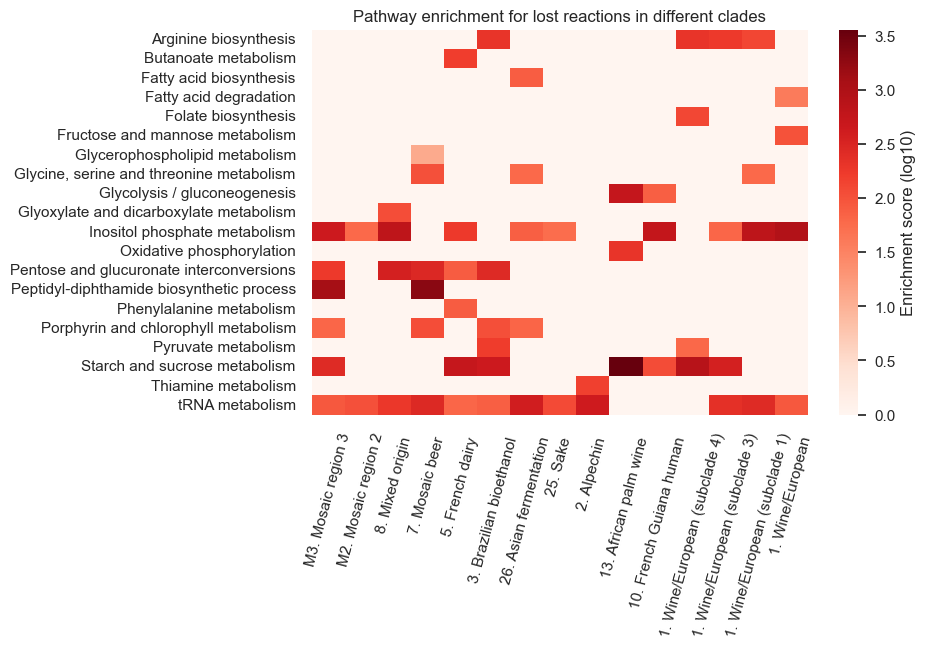

In [ ]:
# plot the enrichment score as heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
# set font style as Arial
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8, 5))
df_clades_score_log=np.log10(df_clades_score+1)
sns.heatmap(df_clades_score_log, cmap="Reds")
plt.title('Pathway enrichment for lost reactions in different clades')
plt.xticks(rotation=75)
# # set color bar title
cbar = plt.gca().collections[0].colorbar
cbar.set_label('Enrichment score (log10)')
plt.show()

In [108]:
# compare the growth rate difference among different clade
# load growth data
df_exp_data = pd.read_csv('data/transcriptomics/combined_969growth_data.csv', index_col=0)
# remove rows with genome_id is NaN
df_exp_data = df_exp_data[df_exp_data['genome_id'].notnull()]
# set genome_id as index
df_exp_data = df_exp_data.set_index('genome_id')
exp_growth = df_exp_data['t_mid_norm']
exp_growth=1/exp_growth
df_growth=pd.DataFrame({'growth':exp_growth})

# add strain type
df_growth['type']=df_growth.index.map(lambda x: df_strain_info.loc[x,'nature_clade'])
df_growth['type'] = df_growth['type'].map(lambda x: 'wildtype' if x in wildtypelist else x)

# remove clade if it has less than 15 strains
df_growth = df_growth.groupby('type').filter(lambda x: len(x) >= 15)

# sort df_model_size by type,and set wildtype as the first
df_growth = df_growth.sort_values(by='type',ascending=False)
df_growth

,growth,type
genome_id,,
CDF_1.re,0.072395,wildtype
BAN_7.re,0.167500,wildtype
BAQ_7.re,0.095263,wildtype
CCS_1.re,0.081280,wildtype
BAG_6.re,0.094172,wildtype
...,...,...
CFQ_4.re,0.089911,1. Wine/European
CED_4.re,0.073562,1. Wine/European
BIP_3.re,0.177262,1. Wine/European


M3. Mosaic region 3 0.28002406764177534
M2. Mosaic region 2 0.5734996781484909
8. Mixed origin  0.013805164012497996
7. Mosaic beer  0.0648629825291793
6. African beer  0.41553890583074593
5. French dairy  2.759836226943344e-06
3. Brazilian bioethanol  0.0012320724935609162
26. Asian fermentation  0.016323394021324503
25. Sake  0.2925131109609716
2. Alpechin  0.0010108223118711415
13. African palm wine  0.3175837280907131
10. French Guiana human  0.288479755067531
1. Wine/European (subclade 4) 0.046978210154821204
1. Wine/European (subclade 3) 1.7037453285474043e-06
1. Wine/European (subclade 1) 0.2743971242179849
1. Wine/European  0.33002330720345685


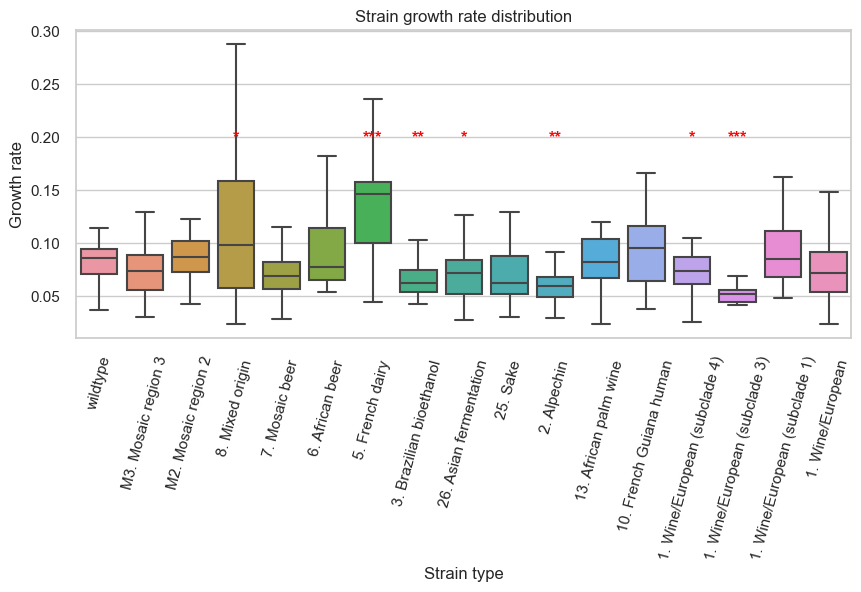

,growth,type
genome_id,,
CDF_1.re,0.072395,wildtype
BAN_7.re,0.167500,wildtype
BAQ_7.re,0.095263,wildtype
CCS_1.re,0.081280,wildtype
BAG_6.re,0.094172,wildtype
...,...,...
CFQ_4.re,0.089911,1. Wine/European
CED_4.re,0.073562,1. Wine/European
BIP_3.re,0.177262,1. Wine/European


In [111]:
# plot box plot, and calculate the pvalue of each clade to wildtype
plt.figure(figsize=(10, 4))
sns.boxplot(x="type", y="growth", data=df_growth,showfliers=False)
plt.title('Strain growth rate distribution')
plt.ylabel('Growth rate')
plt.xlabel('Strain type')
plt.xticks(rotation=75)
# calculate p value
from scipy import stats
df_p = pd.DataFrame()
for t in df_growth['type'].unique():
    if t != 'wildtype':
        p = stats.ttest_ind(df_growth[df_growth['type']==t]['growth'], df_growth[df_growth['type']=='wildtype']['growth']).pvalue
        print(t, p)
        if p < 0.05:
            # add p value to plot
            if p<0.001:
                sig='***'
            elif p<0.01:
                sig='**'
            else:
                sig='*'
            plt.text(df_growth['type'].unique().tolist().index(t), 0.2, sig, fontsize=12, ha='center', va='center', color='red', weight='bold')
plt.show()
df_growth